# Recursive multi-step forecasting with exogenous variables


In [1]:
import matplotlib.pyplot as plt
import functions
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

In [2]:
# We are looking at the middle of the pandemic
period = '2020-09-30'

# Number of weeks to predict
steps = 7

# Recursive multi-step forecasting with exogenous variables

## Forecasting Most Restricted

### with Exoginous Variables 


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 22.047536937492094 



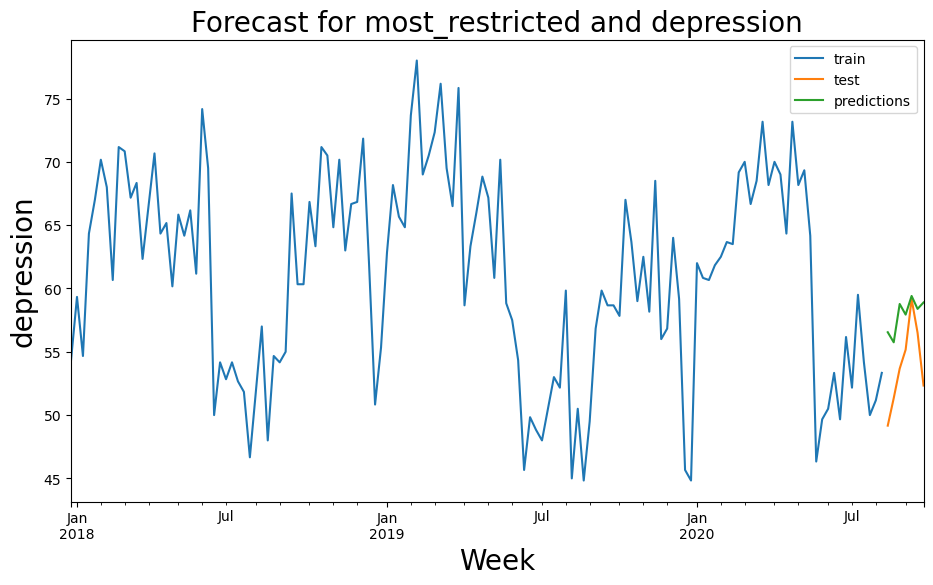


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 63.52104708339071 



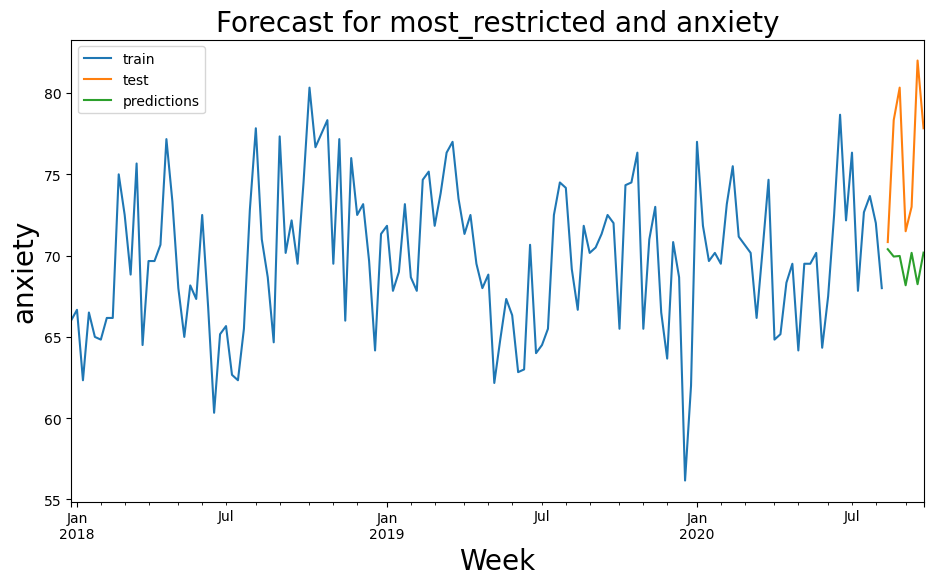


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 2.7963998454265555 



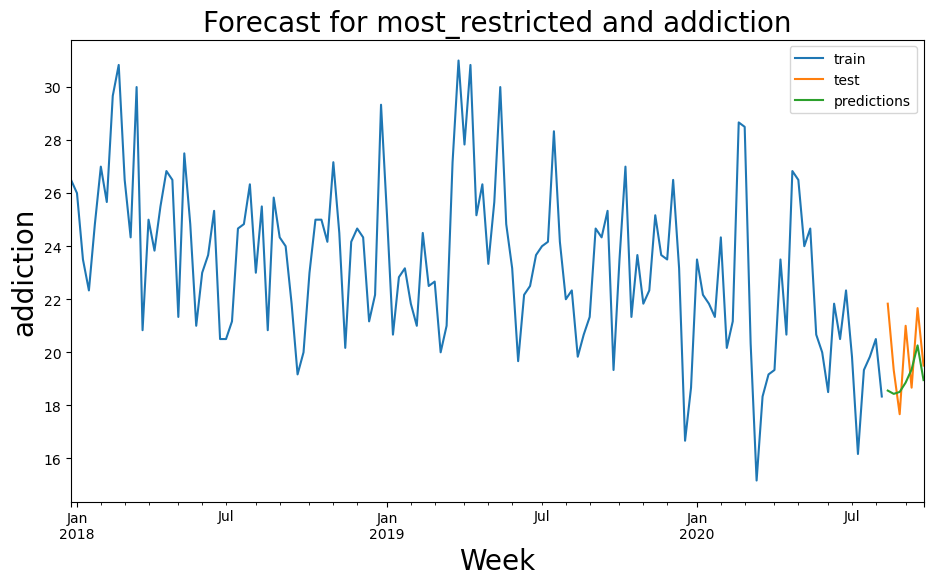


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.883360381698391 



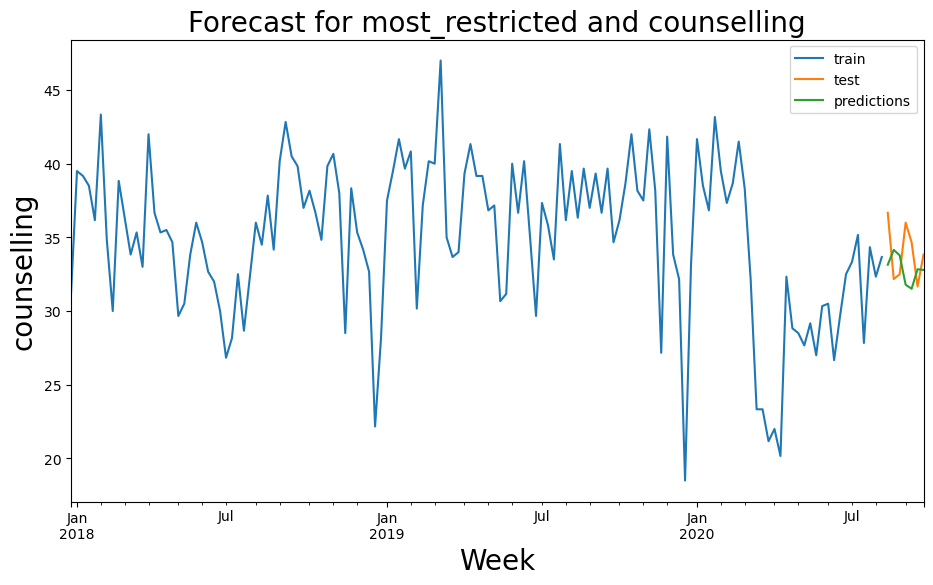


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 15.035570270924959 



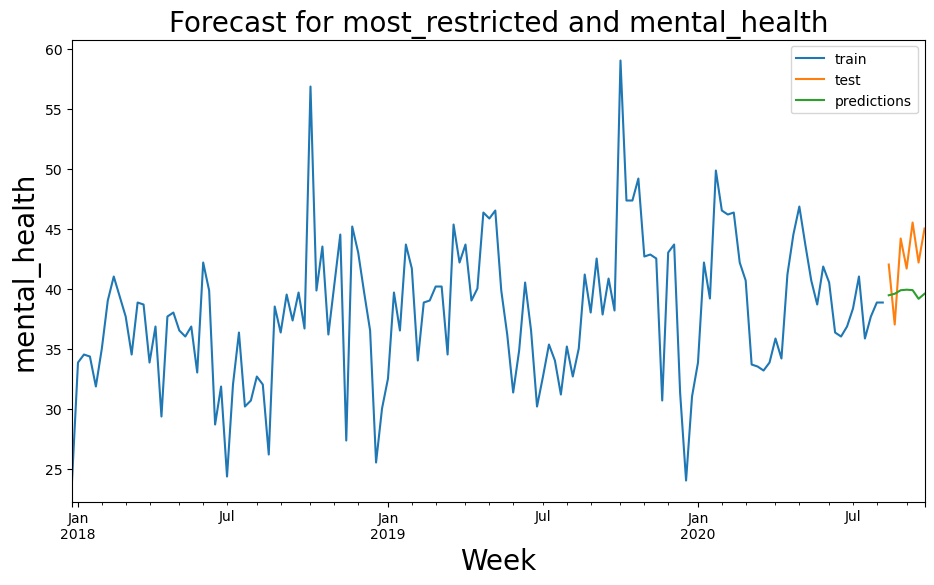

In [3]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE.achieved without hyperparameter tuning.

In [10]:
# Get feature importances for COVID-19 restrictions.
feature_imp_most = feature_imp_most.loc[15:19]

## without Exoginous Variables 

In [4]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_most[search] = mse


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 44.74432421890516 


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 69.47394845791523 


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 3.680832780177154 


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.08600964507275 


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 21.314784602020065 



In [5]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_most = functions.dict_diff(fa_mse_dic_most)
print(rf_diff_most)

AttributeError: module 'functions' has no attribute 'dict_diff'

Mental health had 

# Least Restricted Forecasting for middle of COVID-19 pandemic 

##  with Exoginous Variables 

In [5]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_least = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period='2020-09-30', steps=7, search=search, regressor=Ridge(), lags=15)
        
        if feature_imp_least.empty:
            feature_imp_least = forecast.get_feature_importance()
            feature_imp_least.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_least = feature_imp_least.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_least.rename(columns={'importance': search}, inplace=True)


 Forecast for least_restricted and depression untill 2020-09-30 



ValueError: time data <<<<<<< HEAD doesn't match format specified

In [17]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_least = feature_imp_least.iloc[15:]

## without Exoginous Variables 


 Forecast for least_restricted and depression untill 2020-09-30 

Test error (mse): 35.72870875316318 

Feature Importances
   feature  importance
0    lag_1    0.503181
1    lag_2   -0.003766
2    lag_3    0.209751
3    lag_4   -0.005600
4    lag_5    0.155098
5    lag_6   -0.171681
6    lag_7    0.001269
7    lag_8   -0.022469
8    lag_9   -0.014643
9   lag_10    0.025751
10  lag_11    0.057913
11  lag_12    0.013746
12  lag_13   -0.137336
13  lag_14   -0.020443
14  lag_15   -0.123410

 Forecast for least_restricted and anxiety untill 2020-09-30 

Test error (mse): 32.624502871595595 

Feature Importances
   feature  importance
0    lag_1    0.196790
1    lag_2    0.050849
2    lag_3    0.208838
3    lag_4    0.132321
4    lag_5    0.179611
5    lag_6   -0.158533
6    lag_7   -0.129158
7    lag_8   -0.155851
8    lag_9   -0.206098
9   lag_10    0.119964
10  lag_11    0.003593
11  lag_12    0.088662
12  lag_13    0.058874
13  lag_14   -0.064559
14  lag_15   -0.110228

 Forecast for l

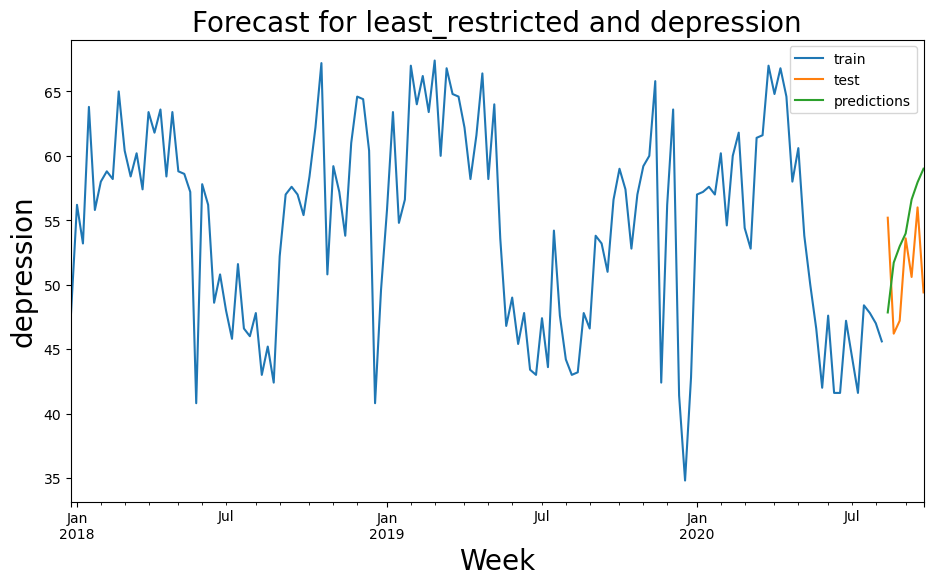

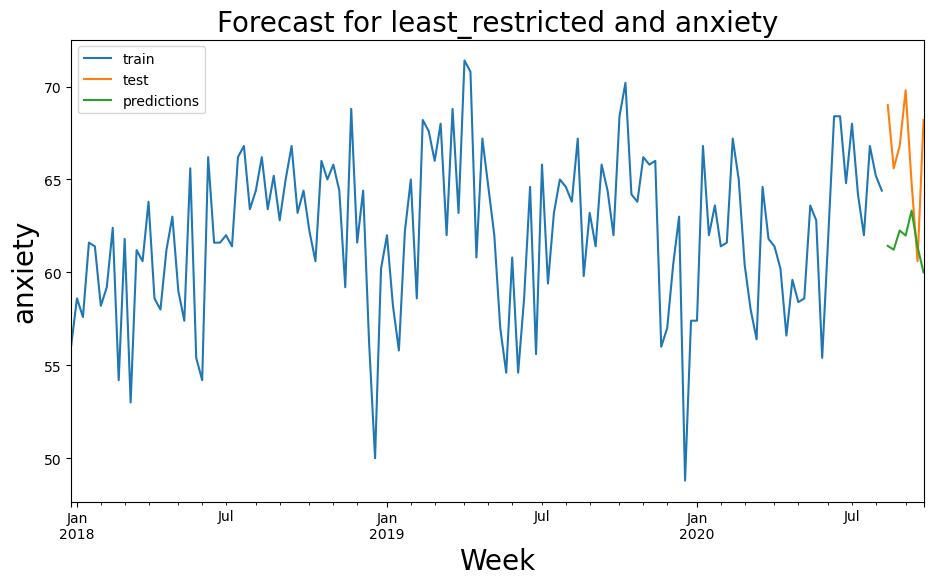

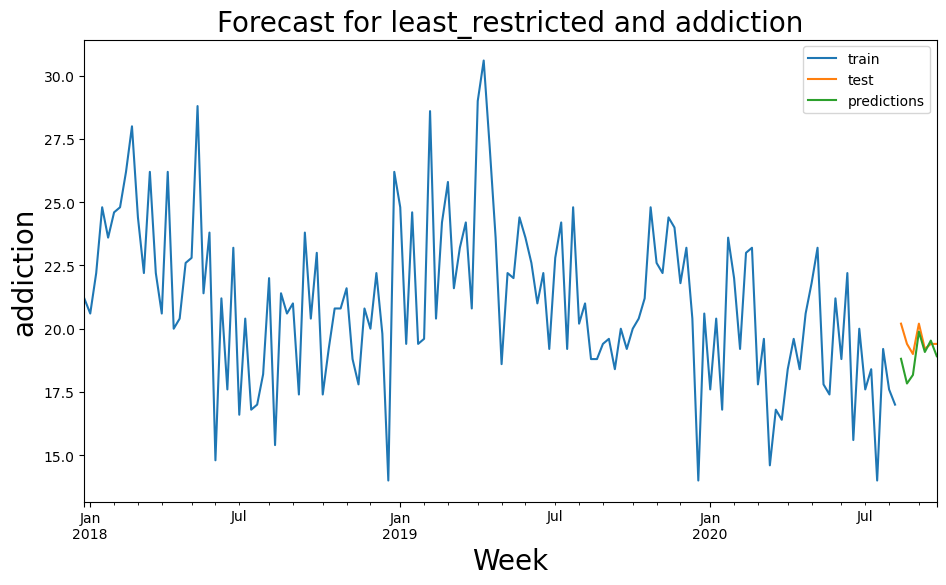

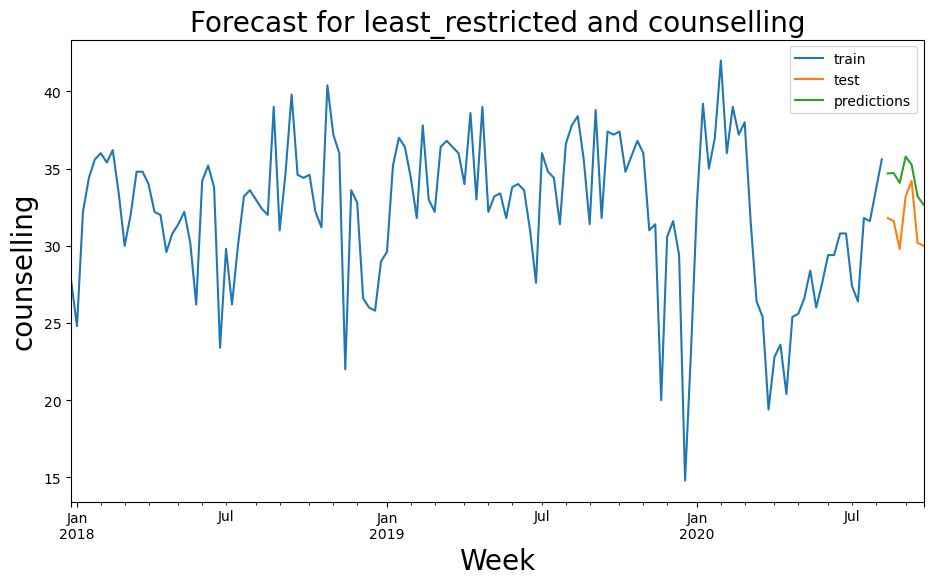

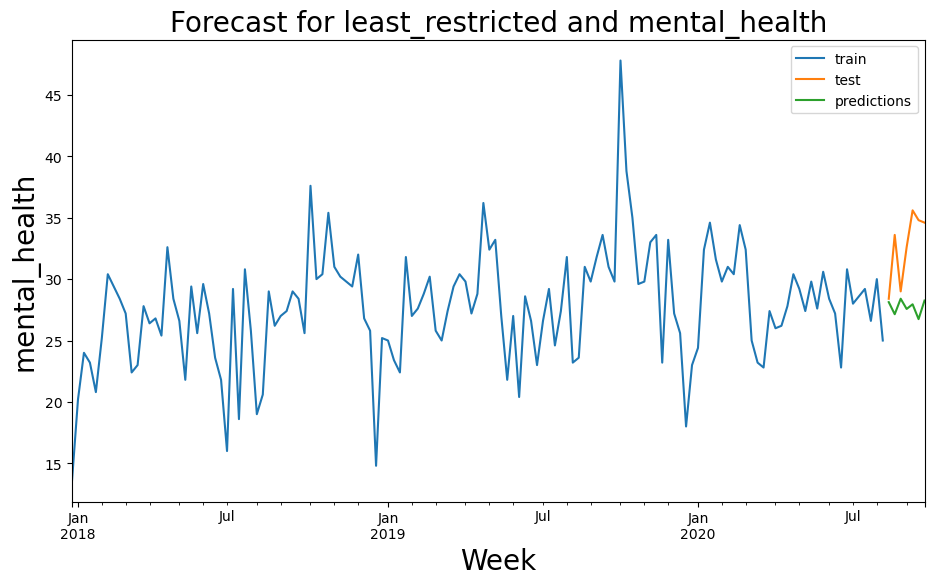

In [18]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='least_restricted', period='2020-09-30', steps=7, search=search, regressor=Ridge(), lags=15)

## Covid-19 Restrictions importances for forecasting 

In [19]:
feature_imp_all = feature_imp_most.merge(feature_imp_least, on = 'feature', how='left', suffixes=['_most','_least'])

In [20]:
feature_imp_all.head()

,feature,depression_most,anxiety_most,addiction_most,counselling_most,mental_health_most,depression_least,anxiety_least,addiction_least,counselling_least,mental_health_least
0,stay_at_home,0.130038,-0.457805,0.500951,-1.198333,1.587330,2.614271,-2.169167,0.774021,-0.549465,0.967768
1,mask_mandate,-1.821330,1.187050,-1.172324,2.901401,1.194043,-1.074137,1.364037,-1.680019,-0.188039,-0.526005
2,gatherings_banned,0.098560,-0.097177,-0.110236,-2.989455,0.084260,-1.350096,1.092729,-0.945568,-3.007525,-0.429543
3,business_closures,0.098560,-0.097177,-0.110236,-2.989455,0.084260,-2.554155,0.168543,-0.288176,-0.809777,-0.272845
4,travel_restrictions,0.524059,-0.054653,-1.850632,-0.947946,-0.081568,1.570752,-1.838990,0.885408,-0.877846,1.249865


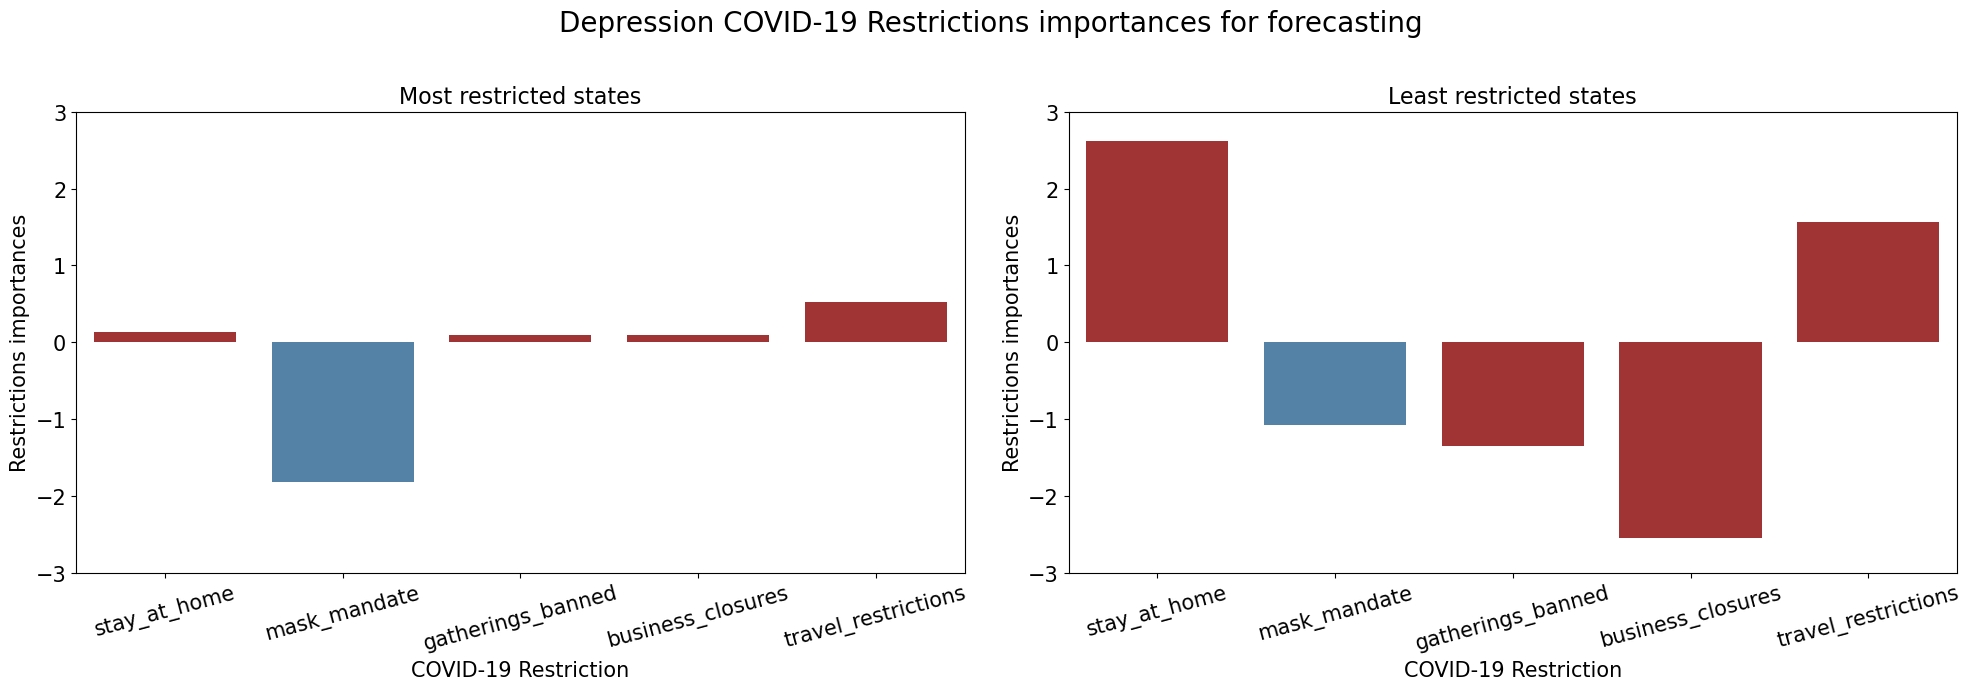

In [21]:
# Restriction importances for Depression
functions.plot_resiriction_importances(feature_imp_all, 'depression', ylim=[-3, 3], time='2020-09-30')

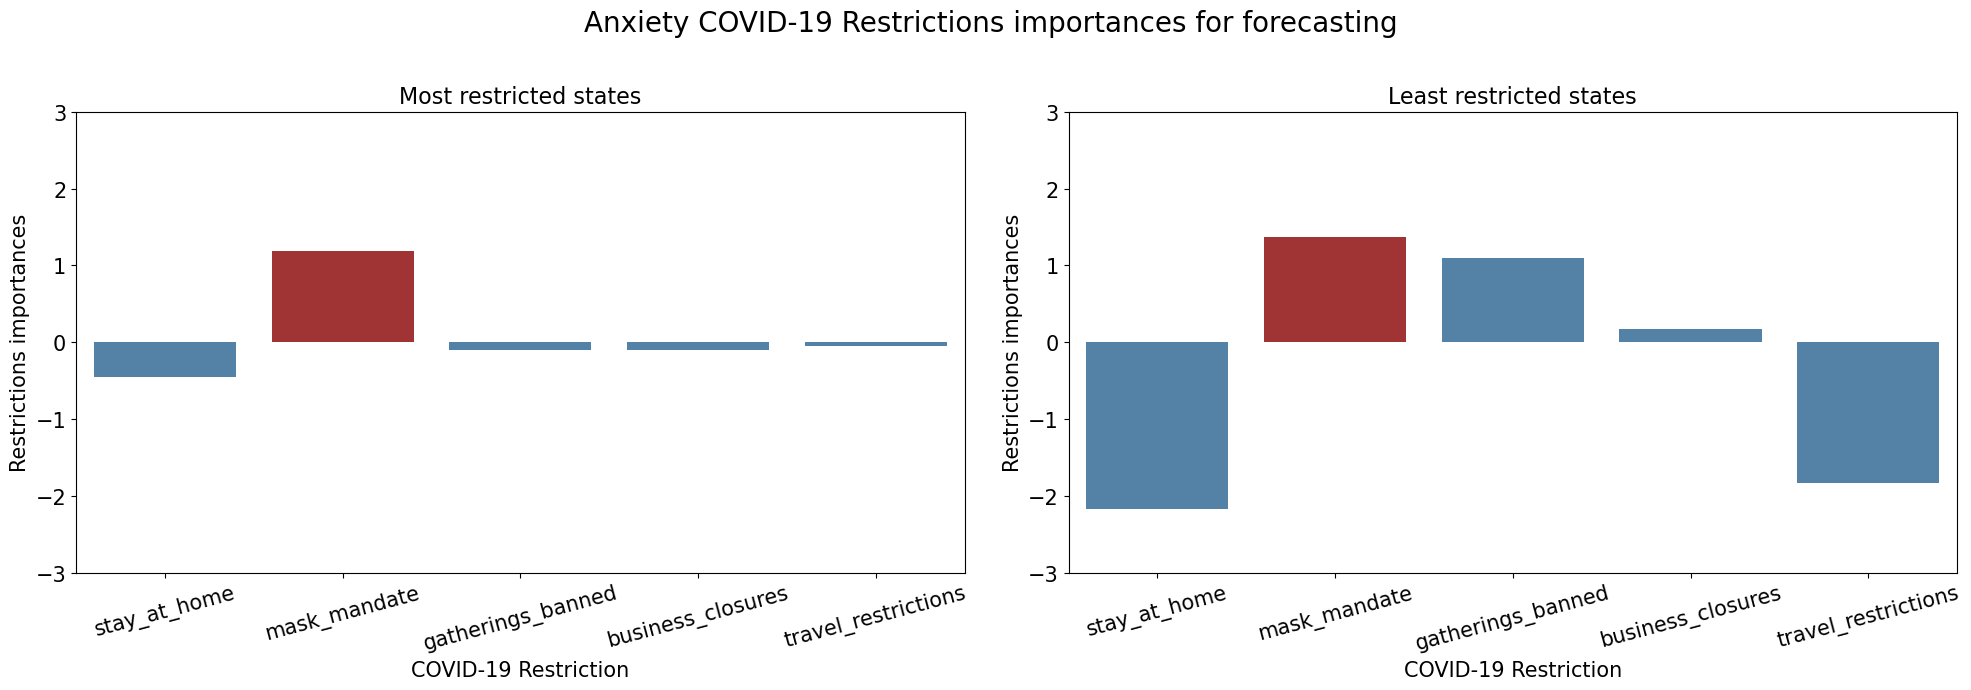

In [22]:
# Restriction importances for Anxiety
functions.plot_resiriction_importances(feature_imp_all, 'anxiety', ylim=[-3, 3], time='2020-09-30')

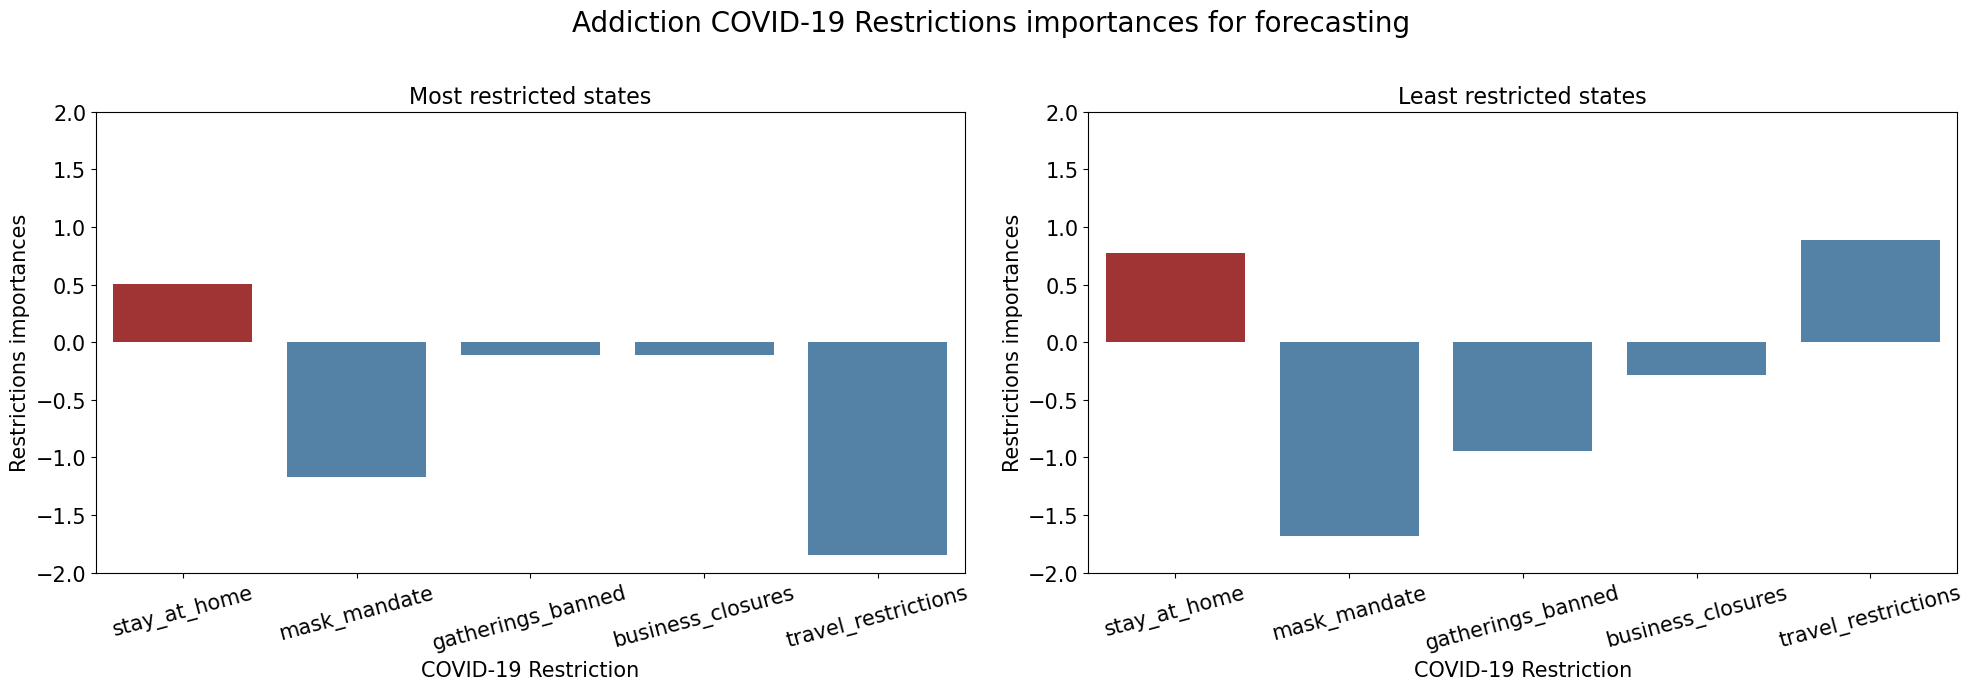

In [23]:
# Restriction importances for Addiction
functions.plot_resiriction_importances(feature_imp_all, 'addiction', ylim=[-2, 2], time='2020-09-30')

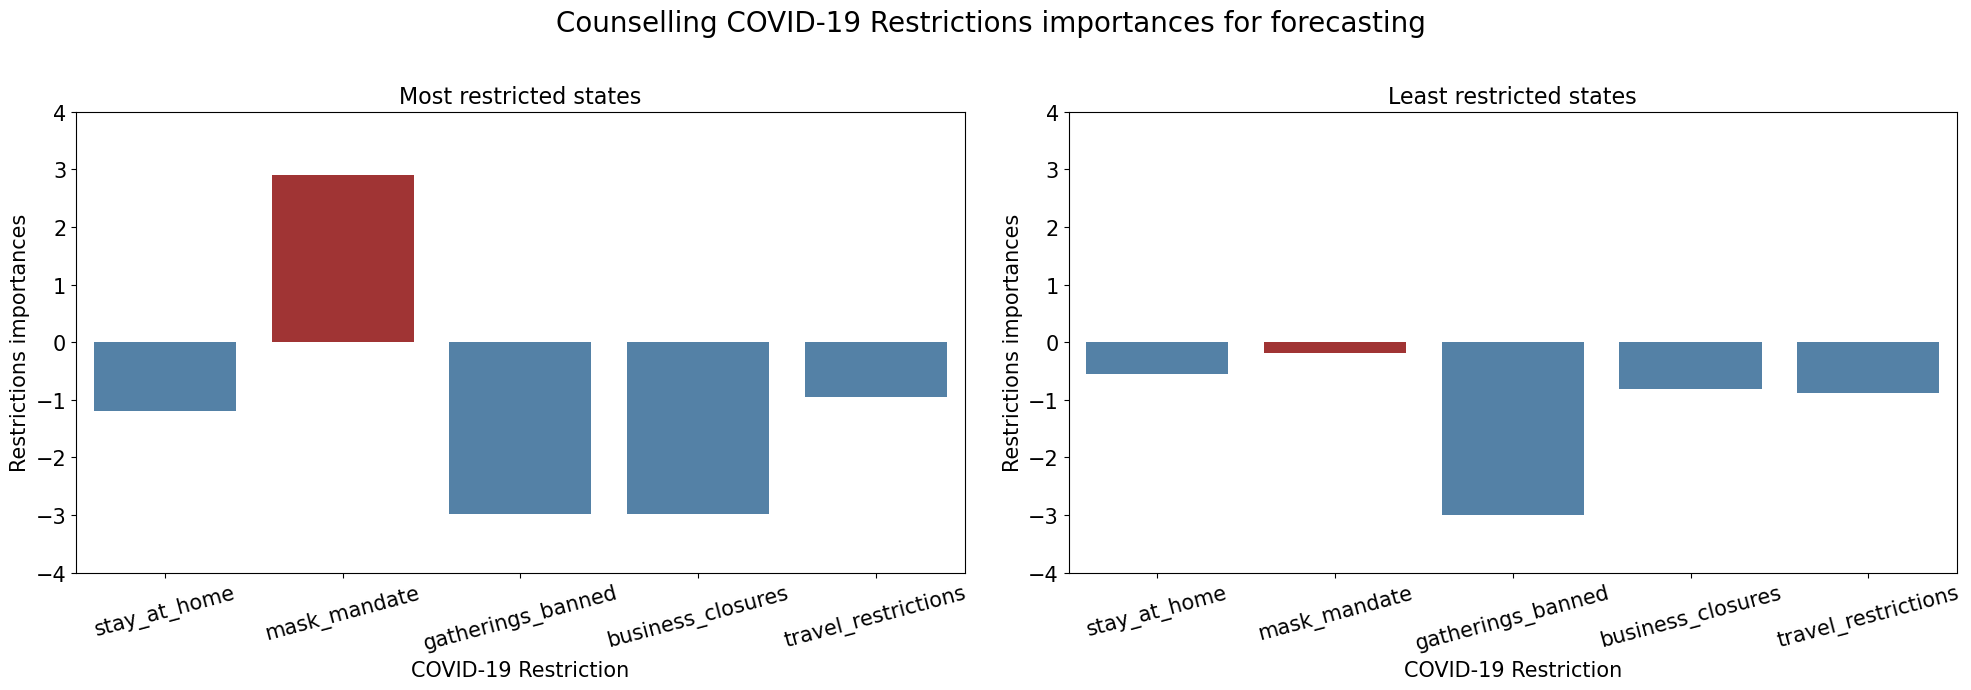

In [24]:
# Restriction importances for Counselling
functions.plot_resiriction_importances(feature_imp_all, 'counselling', ylim=[-4, 4], time='2020-09-30')

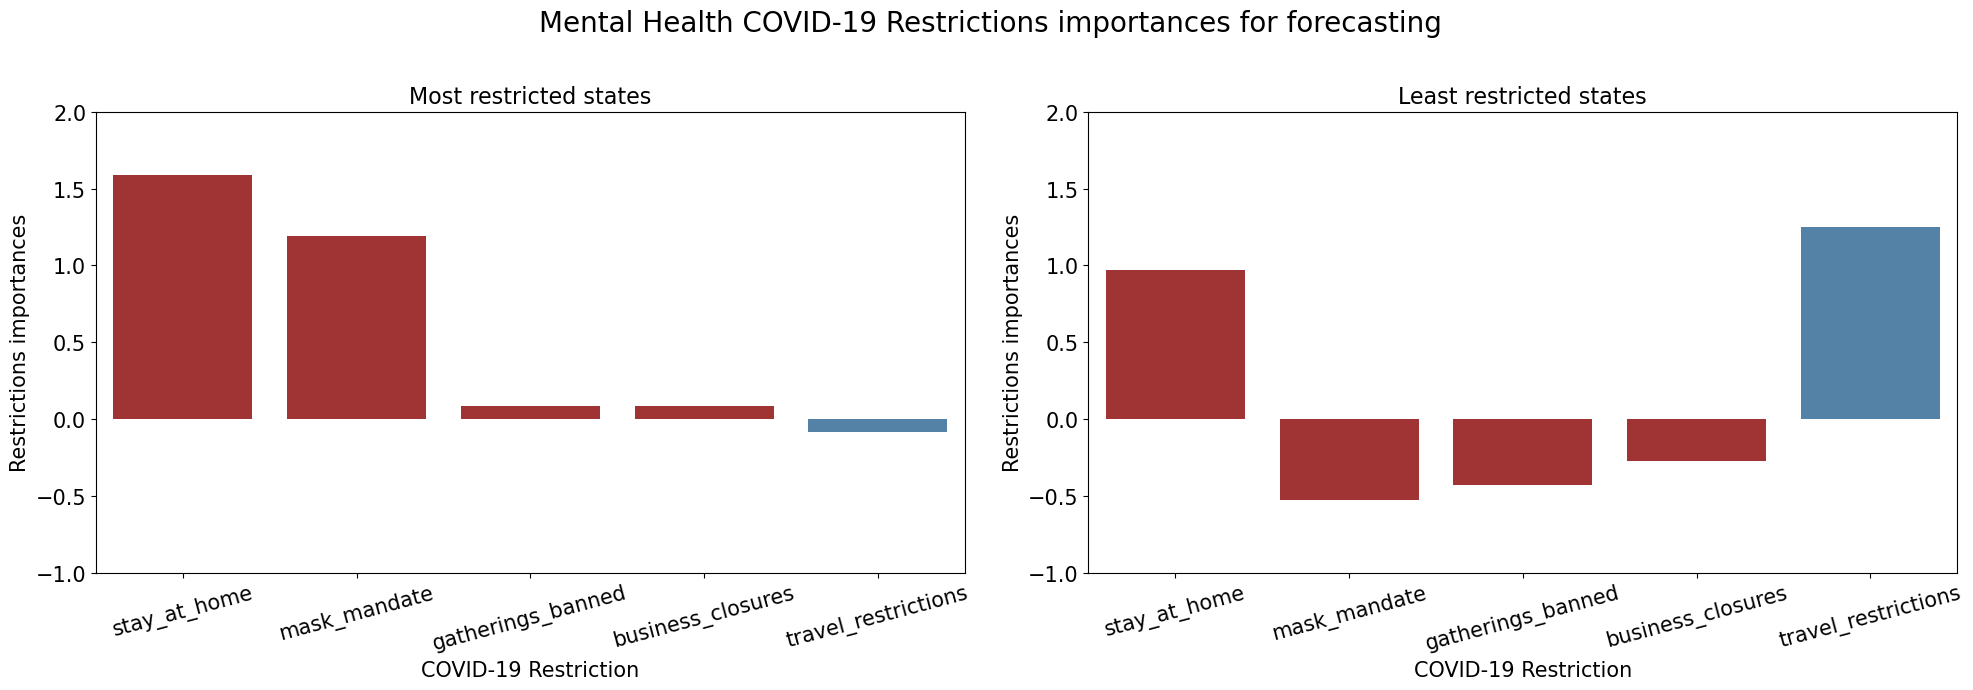

In [25]:
# Restriction importances for Mental Health
functions.plot_resiriction_importances(feature_imp_all, 'mental_health', ylim=[-1, 2], time='2020-09-30')

# Forecasting with Exoginous Variables for August 2020 for middle of COVID-19 pandemic 

Since the ForecasterAutoreg object uses Scikit-learn models, the importance of predictors can be accessed once trained. When the regressor used is a LinearRegression(), Lasso() or Ridge(), the coefficients of the model reflect their importance. In GradientBoostingRegressor() or RandomForestRegressor() regressors, the importance of predictors is based on impurity.

In [60]:

states_list = ['alaska', 'arizona', 'california', 'florida', 'hawaii', 'massachussetts', 'new_york', 'south_dakota', 'texas', 'washington']

for state in states_list:
    for search in searches_list:
        functions.forecast_file_search(file=state, period='2020-09-30', steps=7, search=search, regressor=Ridge(), lags=15, plot = False)


 Forecast for alaska and depression untill 2020-09-30 

Test error (mse): 85.5967032403697 

Feature Importances
                feature  importance
0                 lag_1   -0.029001
1                 lag_2    0.034882
2                 lag_3    0.114986
3                 lag_4    0.094144
4                 lag_5    0.025251
5                 lag_6    0.070878
6                 lag_7   -0.014367
7                 lag_8   -0.022093
8                 lag_9    0.019364
9                lag_10   -0.004074
10               lag_11   -0.026927
11               lag_12   -0.065673
12               lag_13    0.101500
13               lag_14   -0.013612
14               lag_15   -0.028233
15         stay_at_home    5.543438
16         mask_mandate    0.000000
17    gatherings_banned   -1.451819
18    business_closures   -1.451819
19  travel_restrictions   -2.570043

 Forecast for alaska and anxiety untill 2020-09-30 

Test error (mse): 120.61212857315817 


 Forecast for alaska and addiction u

## Closer look at best predicting models

In [61]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='anxiety', regressor=Ridge(), lags=15)


 Forecast for alaska and anxiety untill 2020-09-30 

Test error (mse): 120.61212857315817 



In [62]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 




 Forecast for alaska and mental_health untill 2020-09-30 

Test error (mse): 94.7097387993141 

Feature Importances
                feature  importance
0                 lag_1    0.074684
1                 lag_2    0.036526
2                 lag_3   -0.041883
3                 lag_4   -0.124576
4                 lag_5    0.096370
5                 lag_6   -0.002948
6                 lag_7    0.042080
7                 lag_8   -0.207064
8                 lag_9    0.049887
9                lag_10   -0.028257
10               lag_11    0.057441
11               lag_12    0.002639
12               lag_13   -0.084441
13               lag_14    0.100312
14               lag_15    0.156631
15         stay_at_home    4.980641
16         mask_mandate    0.000000
17    gatherings_banned   -1.045801
18    business_closures   -1.045801
19  travel_restrictions    1.328355


ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions'] 
Training range: [Timestamp('2017-12-31 00:00:00'), Timestamp('2020-08-09 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-01-30 13:28:40 
Last fit date: 2023-01-30 13:28:40 
Skforecast version: 0.6.0 
Python version: 3.9.13 

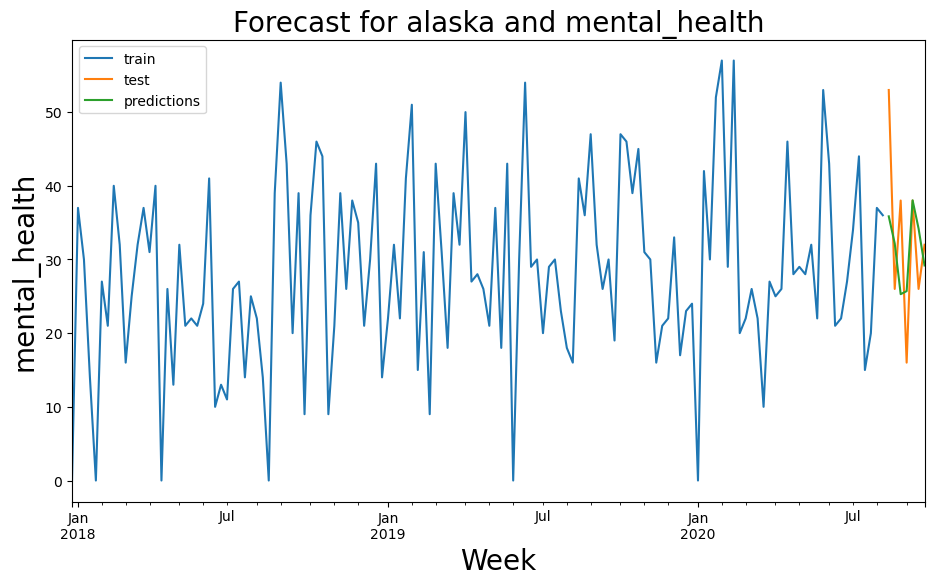

In [63]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='mental_health', regressor=Ridge(), lags=15)

In [64]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



In [65]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



In [66]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



In [67]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



In [68]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



In [69]:
functions.forecast_file_search(file='alaska', period='2020-09-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-09-30 

Test error (mse): 105.23180332036775 



Prophet

In [12]:
from prophet import Prophet